In [1]:
#Script to obtain data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv("C:/Users/Krishna/Mini Project/Sem-6/Music_Recommentdation_ML/datasets/data_moods.csv")

In [3]:
col_features = df.columns[6:-3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

In [4]:
#Encodethe categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

In [5]:
#To get consistent output 
np.random.seed(45)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.15,random_state=20)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [27]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 10 dim with relu function
    model.add(Dense(10,input_dim=10,activation='relu'))
    #Add 1 layer with 8 nodes,input of 10 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [28]:
estimator = KerasClassifier(build_fn=base_model,epochs=350,batch_size=160,verbose=0)

In [29]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

Baseline: 80.74% (3.57%)


In [30]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)

In [31]:
pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=350,
                                                                             batch_size=160,verbose=0))])
    #Fit the Pipeline
pip.fit(X2,encoded_y)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('keras',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000015C11350248>)])

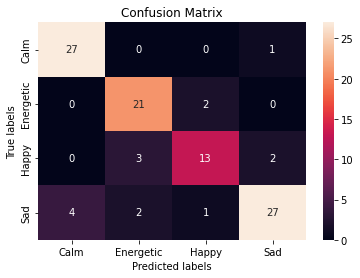

Accuracy Score 0.8543689320388349


In [32]:
cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [33]:
def predict_mood(id_song):
    #Obtain the features of the song
    preds = id_song
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    name_song = preds[0][0]
    artist = preds[0][2]

    return print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
    #print(f"{name_song} by {artist} is a {mood[0].upper()} song")
    

In [34]:
df.head(10)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.137000,0.7300,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.018900,0.8320,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.913000,0.1390,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.089000,0.4380,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.001710,0.9320,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,2020-07-31,27,129410,0.394,0.995000,0.0475,0.955000,0.1050,0.172,-26.432,0.0720,71.241,6,5,Calm
6,A La Plage,A La Plage,Ron Adelaar,79NmiFAgcXUIVDGfCWDdWF,2020-08-07,29,141888,0.504,0.994000,0.0584,0.956000,0.1150,0.553,-20.461,0.0516,134.209,5,4,Calm
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,4l2hnfUx0esSbITQa7iJt0,2009-12-28,1,211173,0.586,0.000155,0.9350,0.277000,0.1590,0.580,-9.386,0.0482,114.997,4,4,Happy
8,A Place for My Head,Hybrid Theory (Bonus Edition),Linkin Park,5rAxhWcgFng3s570sGO2F8,2000-10-24,68,184640,0.603,0.014400,0.9080,0.000000,0.6710,0.457,-5.254,0.1840,133.063,11,4,Energetic
9,ATTACK,A Beautiful Lie + 30 Seconds To Mars,Thirty Seconds To Mars,6QxTWEvzcJljVZaeTzuHF1,2007-05-15,0,189200,0.331,0.003440,0.8760,0.000835,0.7320,0.299,-1.894,0.0603,175.009,5,4,Energetic


In [35]:
df.iloc[80]

name                            Breathe Me
album                 Colour The Small One
artist                                 Sia
id                  7jqzZyJJLrpkRFYGpkqSK6
release_date                    2004-01-01
popularity                              68
length                              272800
danceability                         0.552
acousticness                        0.0364
energy                               0.643
instrumentalness                      0.74
liveness                             0.105
valence                              0.212
loudness                             -7.36
speechiness                         0.0327
tempo                              120.012
key                                      0
time_signature                           4
mood                                   Sad
Name: 80, dtype: object

In [43]:
x = df.iloc[91].values.flatten().tolist()
print(x.pop())
column_name = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
                'liveness','valence','loudness','speechiness','tempo','key','time_signature']
song_input = [x, column_name]
# song_input
predict_mood(song_input)

Energetic
Chop Suey! by System Of A Down is a ENERGETIC song


In [ ]:
# pip.save('C:/Users/Krishna/Mini Project/Sem-6/MusicRecommentdationML/models/music_classification.h5')